## Project II - Regression Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'low fat', 'Regular', 'reg'],['LF','LF','REG','REG'])

In [4]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [5]:
avg = df['Item_Weight'].mean()
df['Item_Weight'].fillna(value=avg, inplace=True)

In [6]:
df['Outlet_Size'].fillna(value='Medium', inplace=True)

In [7]:
df = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [8]:
df_real = pd.get_dummies(df, drop_first=True)
df_real

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_REG,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,549.2850,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0


In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [10]:
X = df_real.drop(['Item_Outlet_Sales'], axis=1)
y = np.array(df_real['Item_Outlet_Sales']).reshape(-1,1)

In [11]:
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

## 59

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [15]:
predicted = sc_y.inverse_transform(rf_regressor.predict(X_test))
predicted

array([3223.597202, 3860.714538, 6095.685294, ..., 2271.616388,
       2526.930714, 2767.470938])

In [16]:
y_real = sc_y.inverse_transform(y_test)

## 60

In [17]:
from sklearn import metrics

In [18]:
print('MAE:', metrics.mean_absolute_error(y_real, predicted))
print('MSE:', metrics.mean_squared_error(y_real, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_real, predicted)))
print('R2:', metrics.r2_score(y_real, predicted))

MAE: 801.6036046701754
MSE: 1287649.9551074225
RMSE: 1134.7466479824573
R2: 0.5635560097940837


## 61

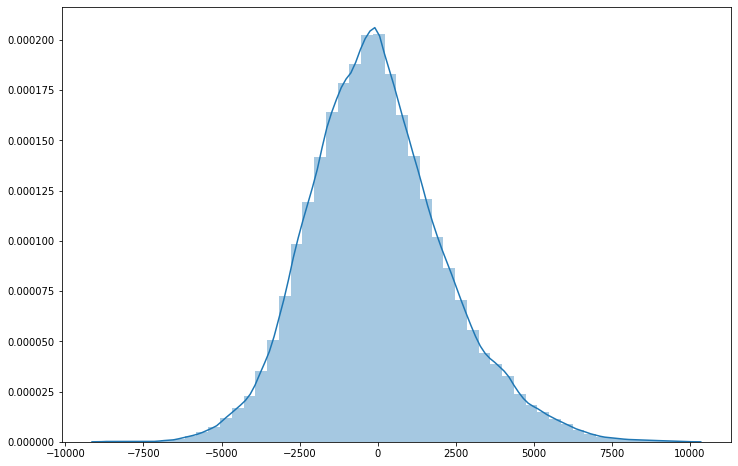

In [19]:
fig=plt.figure(figsize=(12,8))
sns.distplot((y_real-predicted), bins=50)

## 62

In [20]:
dict_compare = {'Sales': y_real.flatten(), 'Predicted': predicted.flatten()}
df_predicted = pd.DataFrame(dict_compare)
df_predicted

,Sales,Predicted
0,4426.2384,3223.597202
1,4845.0266,3860.714538
2,2293.0152,6095.685294
3,1065.2800,1833.559936
4,2345.6134,2489.492780
...,...,...
1700,3207.8244,2576.559446
1701,2263.7200,1196.362704
1702,1906.8512,2271.616388
1703,2773.0570,2526.930714


In [21]:
print(df_predicted.to_string())

           Sales    Predicted
0      4426.2384  3223.597202
1      4845.0266  3860.714538
2      2293.0152  6095.685294
3      1065.2800  1833.559936
4      2345.6134  2489.492780
5       322.2472   504.894450
6      1860.2452  1241.663736
7       209.7270   604.762785
8      4377.6350  4629.899962
9       322.9130  1023.487734
10      314.2576   560.556439
11       56.5930   209.983333
12     2407.5328  2381.260332
13     1647.8550  2573.803034
14     3560.6984  1583.279058
15      569.2590  2066.869572
16     4339.0186  3953.973144
17     2402.2064  1940.029346
18     4500.8080  2739.673788
19     4647.2840  4074.722632
20     2233.0932  1576.075102
21     1603.9122  2594.922210
22     2763.0700  1334.010196
23     6239.8776  4313.678252
24      588.5672   589.219684
25     1565.9616  3066.355216
26     4175.8976  5196.748766
27     1631.2100  2823.404796
28     1539.9954  2717.788942
29      745.6960  1707.077910
30     3775.0860  4481.213506
31     1491.3920  2213.804974
32     313

## 63

In [22]:
df_predicted.corr()

,Sales,Predicted
Sales,1.000000,0.752066
Predicted,0.752066,1.000000
